In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

from tensorflow import keras

import numpy as np

In [0]:
data=keras.datasets.boston_housing

(xtrain,ytrain),(xtest,ytest)=data.load_data()

order = np.argsort(np.random.random(ytrain.shape))

In [0]:
xtrain=xtrain[order]
ytrain=ytrain[order]

In [18]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']


df = pd.DataFrame(xtrain, columns=column_names)

df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [19]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384
ZN,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237
INDUS,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129
CHAS,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017
NOX,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994
RM,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844
AGE,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898
DIS,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075
RAD,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250
TAX,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752


In [0]:
mean=xtrain.mean(axis=0)
std=xtrain.mean(axis=0)

xtrain = (xtrain-mean)/std

xtest = (xtest-mean)/std


In [0]:
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(xtrain.shape[1],)),
      keras.layers.Dense(64, activation=tf.nn.relu),
      keras.layers.Dense(1)
    ])
  model.compile(loss="mse",optimizer='adam',metrics=['mae'])
  return model


In [22]:
model=build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(xtrain,ytrain,epochs=10000, validation_split=0.1,verbose=0,batch_size=404)

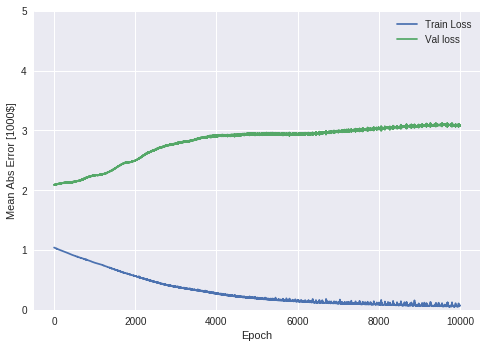

In [26]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

In [0]:
model=build_model()

early=keras.callbacks.EarlyStopping(monitor="val_loss",patience=20)
history= model.fit(xtrain,ytrain,epochs=10000,validation_split=0.15,verbose=0,callbacks=[early])

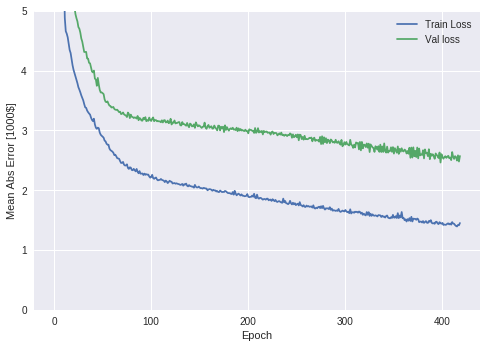

In [28]:
plot_history(history)

In [33]:
[loss,mae]=model.evaluate(xtest,ytest,verbose=0)
print(mae*1000)

2554.517250435025


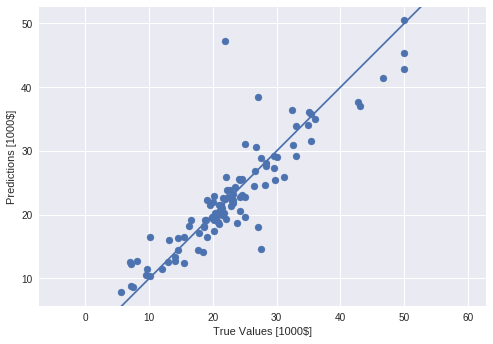

In [36]:
test_predictions = model.predict(xtest).flatten()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

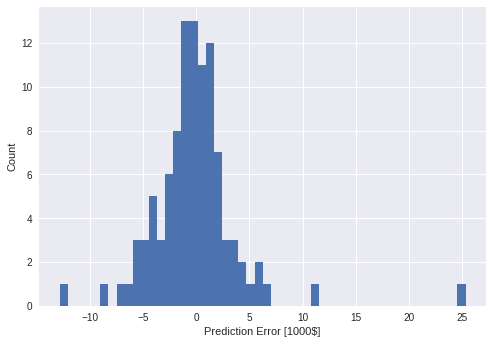

In [38]:
error = test_predictions - ytest
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")